In [13]:
import numpy as np
import csv
import pandas as pd
import os
from tqdm import tqdm
import glob

In [113]:
def load_metrics_as_df(path_to_folder):
    merged_df = None
    files = glob.glob(os.path.join(path_to_folder, '*.csv'))
    for file in files:
        model_name = file.split('/')[-1][:-4]
        df = pd.read_csv(file)
        df.rename(columns={'Unnamed: 0': 'class'}, inplace=True)
        df.set_index('class', inplace=True)
        df_unstacked = df.unstack()
        df_unstacked = df_unstacked.swaplevel()
        df_unstacked = df_unstacked.sort_index()
        df_unstacked.index = df_unstacked.index.map(lambda x: f'{x[0]}_{x[1]}')
        df_flat = df_unstacked.to_frame().T
        df_flat.reset_index(drop=True, inplace=True)
        df_flat['model_name'] = model_name
        if type(merged_df) != None:
            merged_df = pd.concat([merged_df, df_flat])
        else:
            merged_df = df_flat.copy()
    return merged_df

In [114]:
val_path = '/Users/monaabd/Desktop/emotibit_model_data/validation/'
test_path = '/Users/monaabd/Desktop/emotibit_model_data/test/'
val_data = load_metrics_as_df(val_path)
test_data = load_metrics_as_df(test_path)

In [117]:
test_data.columns

Index(['Global_Accuracy', 'Global_F1', 'Global_False Negative #',
       'Global_False Negative Rate', 'Global_False Positive Rate',
       'Global_False Positives #', 'Global_Precision', 'Global_Recall',
       'Learning Class_Accuracy', 'Learning Class_F1',
       'Learning Class_False Negative #', 'Learning Class_False Negative Rate',
       'Learning Class_False Positive Rate',
       'Learning Class_False Positives #', 'Learning Class_Precision',
       'Learning Class_Recall', 'Negative Class_Accuracy', 'Negative Class_F1',
       'Negative Class_False Negative #', 'Negative Class_False Negative Rate',
       'Negative Class_False Positive Rate',
       'Negative Class_False Positives #', 'Negative Class_Precision',
       'Negative Class_Recall', 'Recall Class_Accuracy', 'Recall Class_F1',
       'Recall Class_False Negative #', 'Recall Class_False Negative Rate',
       'Recall Class_False Positive Rate', 'Recall Class_False Positives #',
       'Recall Class_Precision', 'Recal

In [123]:
test_data.set_index('model_name')


,Global_Accuracy,Global_F1,Global_False Negative #,Global_False Negative Rate,Global_False Positive Rate,Global_False Positives #,Global_Precision,Global_Recall,Learning Class_Accuracy,Learning Class_F1,...,Recall Class_Precision,Recall Class_Recall,Recognition Familar Class_Accuracy,Recognition Familar Class_F1,Recognition Familar Class_False Negative #,Recognition Familar Class_False Negative Rate,Recognition Familar Class_False Positive Rate,Recognition Familar Class_False Positives #,Recognition Familar Class_Precision,Recognition Familar Class_Recall
model_name,,,,,,,,,,,,,,,,,,,,,
3.5S_32H_2L,0.835,0.835140,NaN,0.164860,0.054953,NaN,0.835140,0.835140,0.821956,0.824618,...,0.807573,0.779042,0.782800,0.724860,197.0,0.217200,0.063747,342.0,0.674905,0.782800
3.5S_32H_3L,0.832,0.832589,NaN,0.167411,0.055804,NaN,0.832589,0.832589,0.869926,0.841964,...,0.774985,0.794012,0.793826,0.768000,187.0,0.206174,0.046226,248.0,0.743802,0.793826
3.5S_16H_4L,0.854,0.854432,NaN,0.145568,0.048523,NaN,0.854432,0.854432,0.849631,0.851201,...,0.811500,0.819760,0.814774,0.779947,168.0,0.185226,0.046412,249.0,0.747976,0.814774
3.5S_64H_4L,0.791,0.791135,NaN,0.208865,0.069622,NaN,0.791135,0.791135,0.791513,0.775418,...,0.728865,0.722754,0.711136,0.686535,262.0,0.288864,0.060951,327.0,0.663580,0.711136
3.5S_32H_4L,0.831,0.831314,NaN,0.168686,0.056229,NaN,0.831314,0.831314,0.854244,0.842968,...,0.767775,0.801796,0.749724,0.737927,227.0,0.250276,0.047717,256.0,0.726496,0.749724
3S_10H_4L,0.851,0.851587,NaN,0.148413,0.049471,NaN,0.851587,0.851587,0.822404,0.841958,...,0.846110,0.782563,0.823529,0.759599,195.0,0.176471,0.063321,381.0,0.704880,0.823529
3.5S_64H_3L,0.832,0.832111,NaN,0.167889,0.055963,NaN,0.832111,0.832111,0.872694,0.835320,...,0.791768,0.783234,0.750827,0.738211,226.0,0.249173,0.047903,257.0,0.726013,0.750827
3.5S_16H_3L,0.846,0.846460,NaN,0.153540,0.051180,NaN,0.846460,0.846460,0.848708,0.844812,...,0.797798,0.824551,0.780595,0.749206,199.0,0.219405,0.051258,275.0,0.720244,0.780595
3.5S_16H_2L,0.817,0.817443,NaN,0.182557,0.060852,NaN,0.817443,0.817443,0.870849,0.835029,...,0.745198,0.789820,0.710033,0.718349,263.0,0.289967,0.045107,242.0,0.726862,0.710033


In [141]:
test_data.sort_values('Recognition Familar Class_Accuracy')
test_data_filtered = test_data.loc[test_data['Recognition Familar Class_Accuracy']>= 0.8]
test_data_filtered.sort_values('model_name', inplace=True)

/var/folders/wz/qvqys7mx6pq7yyyz9b2_blnr0000gn/T/ipykernel_19381/13310693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_filtered.sort_values('model_name', inplace=True)


In [126]:
wanted_models = list(test_data_filtered['model_name'])

In [154]:
val_data_filtered = val_data[val_data['model_name'].isin(wanted_models)]
val_data_filtered.sort_values('model_name', inplace=True)

/var/folders/wz/qvqys7mx6pq7yyyz9b2_blnr0000gn/T/ipykernel_19381/501303345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data_filtered.sort_values('model_name', inplace=True)


In [157]:
val_data_filtered = val_data_filtered[val_data_filtered['Recall Class_Accuracy'] >= 0.8]

In [158]:
wanted_models = list(val_data_filtered['model_name'])
test_data_filtered = test_data_filtered[test_data_filtered['model_name'].isin(wanted_models)]

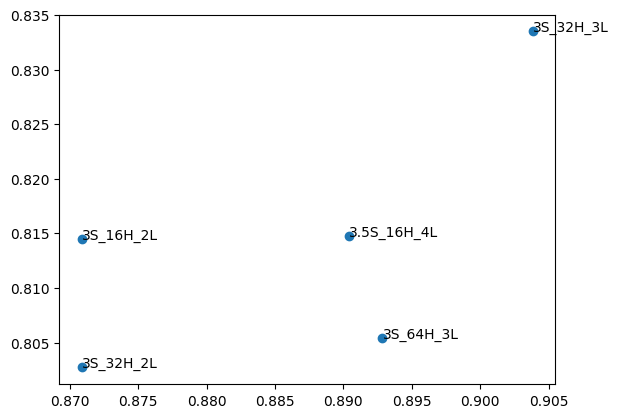

In [159]:
import matplotlib.pyplot as plt
plt.scatter(val_data_filtered['Recognition Familar Class_Accuracy'], test_data_filtered['Recognition Familar Class_Accuracy'])
for i in range(len(val_data_filtered)):
    plt.text(val_data_filtered['Recognition Familar Class_Accuracy'].iloc[i], test_data_filtered['Recognition Familar Class_Accuracy'].iloc[i], val_data_filtered['model_name'].iloc[i])


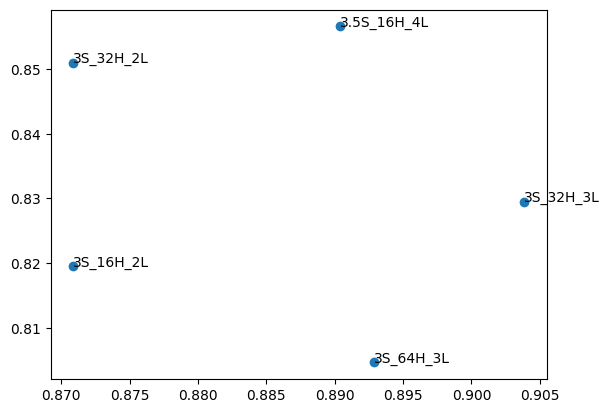

In [160]:
import matplotlib.pyplot as plt
plt.scatter(val_data_filtered['Recognition Familar Class_Accuracy'], val_data_filtered['Recall Class_Accuracy'])
for i in range(len(val_data_filtered)):
    plt.text(val_data_filtered['Recognition Familar Class_Accuracy'].iloc[i], val_data_filtered['Recall Class_Accuracy'].iloc[i], val_data_filtered['model_name'].iloc[i])


In [161]:
val_data_filtered

,Global_Accuracy,Global_F1,Global_False Negative #,Global_False Negative Rate,Global_False Positive Rate,Global_False Positives #,Global_Precision,Global_Recall,Learning Class_Accuracy,Learning Class_F1,...,Recall Class_Recall,Recognition Familar Class_Accuracy,Recognition Familar Class_F1,Recognition Familar Class_False Negative #,Recognition Familar Class_False Negative Rate,Recognition Familar Class_False Positive Rate,Recognition Familar Class_False Positives #,Recognition Familar Class_Precision,Recognition Familar Class_Recall,model_name
0,0.856,0.856391,NaN,0.143609,0.047870,NaN,0.856391,0.856391,0.858333,0.876596,...,0.856604,0.890411,0.825397,32.0,0.109589,0.048477,78.0,0.769231,0.890411,3.5S_16H_4L
0,0.822,0.822253,NaN,0.177747,0.059249,NaN,0.822253,0.822253,0.841096,0.853964,...,0.819536,0.870879,0.782716,47.0,0.129121,0.071587,129.0,0.710762,0.870879,3S_16H_2L
0,0.855,0.855032,NaN,0.144968,0.048323,NaN,0.855032,0.855032,0.841096,0.861150,...,0.850993,0.870879,0.800505,47.0,0.129121,0.061598,111.0,0.740654,0.870879,3S_32H_2L
0,0.868,0.868883,NaN,0.131117,0.043706,NaN,0.868883,0.868883,0.865753,0.881450,...,0.829470,0.903846,0.842510,35.0,0.096154,0.048835,88.0,0.788969,0.903846,3S_32H_3L
0,0.849,0.849492,NaN,0.150508,0.050169,NaN,0.849492,0.849492,0.824658,0.856330,...,0.804636,0.892857,0.817610,39.0,0.107143,0.058824,106.0,0.754060,0.892857,3S_64H_3L
